In [96]:
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud 
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
%matplotlib inline


In [97]:
import os
os.chdir("/Users/shivayogibiradar/Downloads/ai-challenger/data")

data = pd.read_csv("english-1.csv")

In [98]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
#print("Check for missing values in Test dataset")
#null_check=test.isnull().sum()
print(null_check)
print("Check for missing values in Vali dataset")
null_check=valid.isnull().sum()
print(null_check)


print("Check for missing values in Test dataset")
null_check=test.isnull().sum()

Check for missing values in Train dataset
id                                          0
content                                     0
location_traffic_convenience                0
location_distance_from_business_district    0
location_easy_to_find                       0
service_wait_time                           0
service_waiters_attitude                    0
service_parking_convenience                 0
service_serving_speed                       0
price_level                                 0
price_cost_effective                        0
price_discount                              0
environment_decoration                      0
environment_noise                           0
environment_space                           0
environment_cleaness                        0
dish_portion                                0
dish_taste                                  0
dish_look                                   0
dish_recommendation                         0
others_overall_experience             

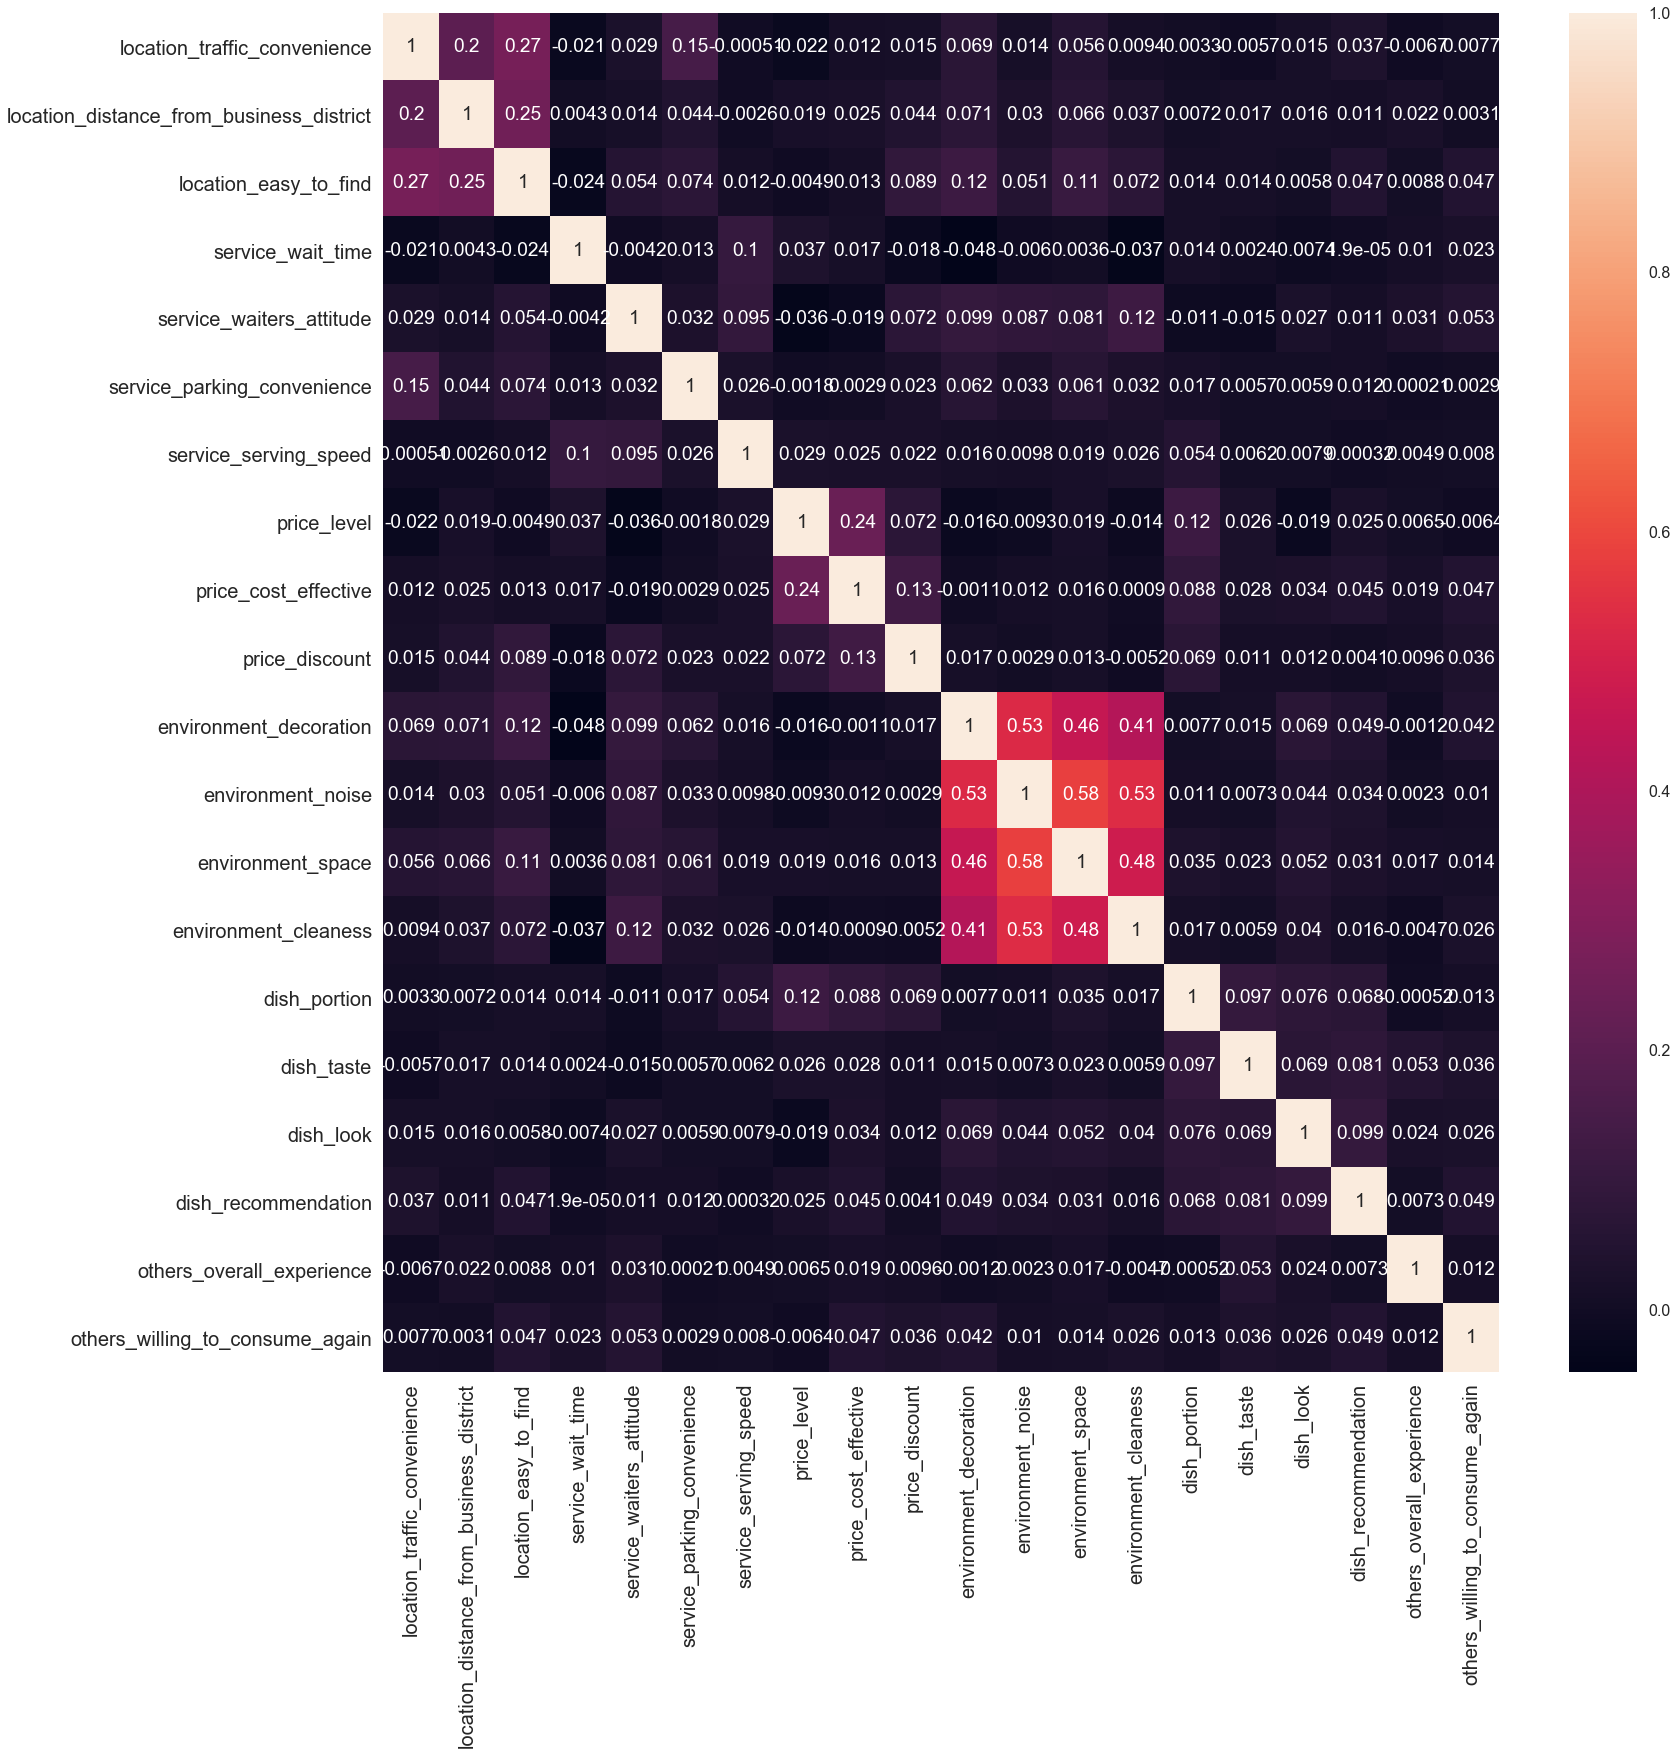

In [99]:
sns.set_context("poster",font_scale=1)
temp_df=data.iloc[:,1:]

corr=temp_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("corrplot.png", bbox_inches='tight')

In [100]:
categories = list(data.columns.values)
categories = categories[2:]
print(categories)

['location_traffic_convenience', 'location_distance_from_business_district', 'location_easy_to_find', 'service_wait_time', 'service_waiters_attitude', 'service_parking_convenience', 'service_serving_speed', 'price_level', 'price_cost_effective', 'price_discount', 'environment_decoration', 'environment_noise', 'environment_space', 'environment_cleaness', 'dish_portion', 'dish_taste', 'dish_look', 'dish_recommendation', 'others_overall_experience', 'others_willing_to_consume_again']


In [101]:
counts = []
for category in categories:
    counts.append((category, data[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,location_traffic_convenience,2265
1,location_distance_from_business_district,2038
2,location_easy_to_find,2374
3,service_wait_time,1136
4,service_waiters_attitude,5929
5,service_parking_convenience,657
6,service_serving_speed,1584
7,price_level,4951
8,price_cost_effective,2373
9,price_discount,3948


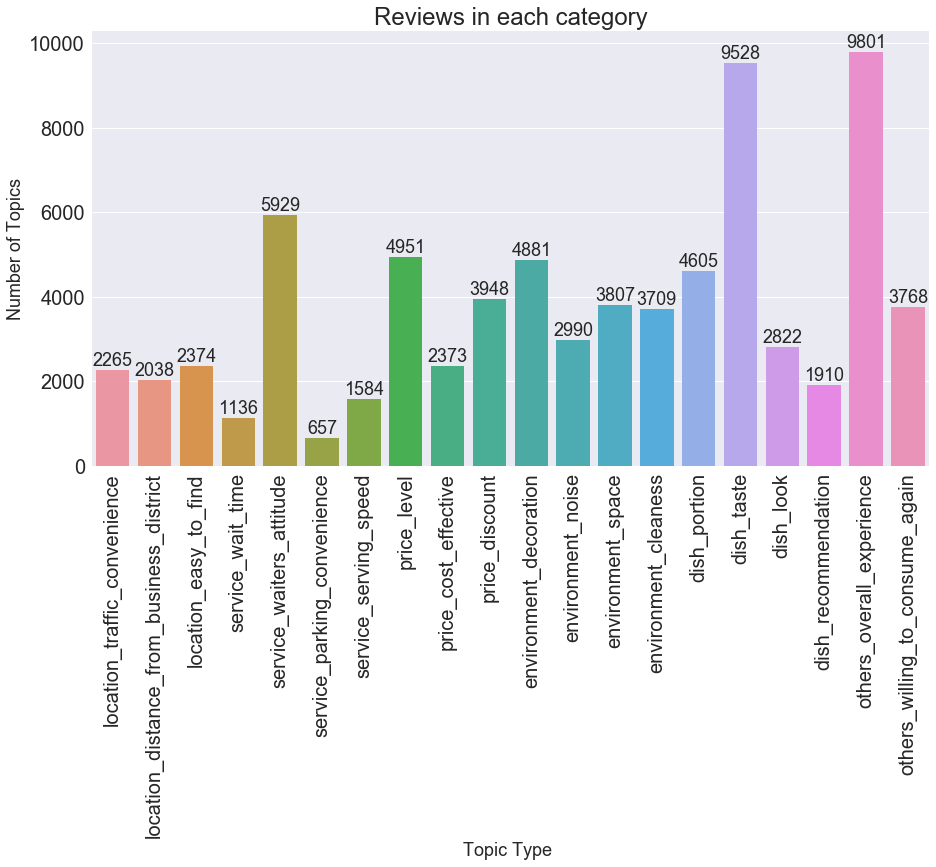

In [102]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data.iloc[:,2:].sum().values)

plt.title("Reviews in each category", fontsize=24)
plt.ylabel('Number of Topics', fontsize=18)
plt.xlabel('Topic Type ', fontsize=18)
plt.xticks(rotation=90,fontsize=20)
#adding the text labels
rects = ax.patches
labels = data.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

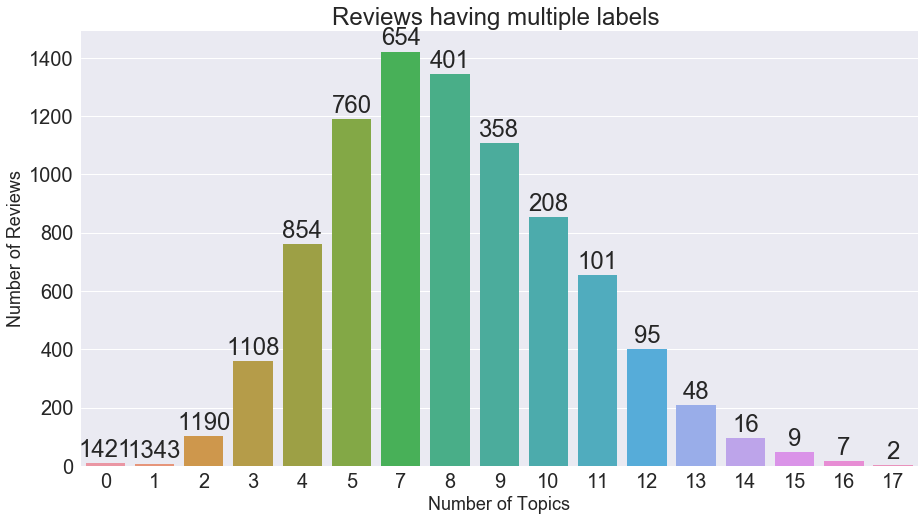

In [103]:
rowSums = data.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Reviews having multiple labels ")
plt.ylabel('Number of Reviews', fontsize=18)
plt.xlabel('Number of Topics', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [48]:

data = data.loc[np.random.choice(data.index, size=2000)]
data.shape

(2000, 22)

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [50]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [51]:
data['content'] = data['content'].str.lower()
data['content'] = data['content'].apply(cleanHtml)
data['content'] = data['content'].apply(cleanPunc)
data['content'] = data['content'].apply(keepAlpha)
data.head()

,id,content,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
5837,5837,it s been a long time but it s far from home i...,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
9645,9645,by chance i was hungry and went in and ate the...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
3415,3415,near the east gate of vientiane hui you can se...,0,1,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,1,1
9889,9889,going to the squid rice the store is not very ...,0,0,0,0,1,0,0,1,...,0,1,1,0,1,1,0,0,1,0
8556,8556,walk along the jinshawan sea view promenade th...,0,0,1,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0


In [52]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['content'] = data['content'].apply(removeStopWords)
data.head()

,id,content,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
5837,5837,long time far home determined g...,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
9645,9645,chance hungry went ate read public co...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
3415,3415,near east gate vientiane hui see striking...,0,1,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,1,1
9889,9889,going squid rice store big although t...,0,0,0,0,1,0,0,1,...,0,1,1,0,1,1,0,0,1,0
8556,8556,walk along jinshawan sea view promenade turn...,0,0,1,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0


In [53]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['content'] = data['content'].apply(stemming)
data.head()

,id,content,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
5837,5837,long time far home determin give give say got ...,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
9645,9645,chanc hungri went ate read public commentari k...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
3415,3415,near east gate vientian hui see strike big cha...,0,1,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,1,1
9889,9889,go squid rice store big although tabl small ta...,0,0,0,0,1,0,0,1,...,0,1,1,0,1,1,0,0,1,0
8556,8556,walk along jinshawan sea view promenad turn le...,0,0,1,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)


(1400, 22)
(600, 22)


In [55]:
train_text = train['content']
test_text = test['content']

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [60]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','content'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','content'], axis=1)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

Multi-Label Classification
Multiple Binary Classifications - (One Vs Rest Classifier)

In [107]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    f1_score(test[category], prediction, average='weighted')  
    print('Test f1 score is {}',f1_score(test[category], prediction, average='weighted')  )
    print("\n")

**Processing location_traffic_convenience comments...**
('Test f1 score is {}', 0.6960163432073544)


**Processing location_distance_from_business_district comments...**
('Test f1 score is {}', 0.7552350621777374)


**Processing location_easy_to_find comments...**
('Test f1 score is {}', 0.6813152139956263)


**Processing service_wait_time comments...**
('Test f1 score is {}', 0.788167115902965)


**Processing service_waiters_attitude comments...**
('Test f1 score is {}', 0.7216901408450705)


**Processing service_parking_convenience comments...**
('Test f1 score is {}', 0.9109278350515463)


**Processing service_serving_speed comments...**
('Test f1 score is {}', 0.774010840108401)


**Processing price_level comments...**
('Test f1 score is {}', 0.5221119064731584)


**Processing price_cost_effective comments...**
('Test f1 score is {}', 0.6835955056179776)


**Processing price_discount comments...**
('Test f1 score is {}', 0.5541615803208603)


**Processing environment_decoration com

In [62]:
Multiple Binary Classifications - (Binary Relevance)

In [128]:


from sklearn.linear_model import LogisticRegression
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("f1score = ",f1_score(y_test,predictions,average="macro"))
print("\n")

('f1score = ', 0.44033809478851965)




Adapted  Algorithm 

In [73]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [129]:


classifier_new = MLkNN(k=18)



x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("f1score = ",f1_score(y_test,predictions,average="macro"))
print("\n")

('f1score = ', 0.44033809478851965)




In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [130]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("f1score = ",f1_score(y_test,predictions,average="macro"))
print("\n")

('f1score = ', 0.21124329613815132)


CPU times: user 1min 14s, sys: 25.6 s, total: 1min 40s
Wall time: 1min 40s


In [131]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [132]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("f1score = ",f1_score(y_test,predictions,average="macro"))
print("\n")

('f1score = ', 0.17686929361258863)


CPU times: user 39.2 s, sys: 2.21 s, total: 41.4 s
Wall time: 40 s
